# Assessing the Model Performance:

This notebook retrieves the best model along with its corresponding best set of hyperparameters that were trained in the 04 - Models section. The purpose of this step is to assess the performance of the model using unseen data.

By applying the best model to this new data, it is possible to evaluate how well it generalizes to examples it hasn't encountered during training. This assessment will provide insights into the model's ability to make accurate predictions and handle real-world scenarios.

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pickle

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, roc_auc_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [5]:
from functions import credit_approval_data_cleaner, n_mo_delinquency

In [9]:
applications_test = pd.read_csv('../data/applications_test.csv')
credits_test = pd.read_csv('../data/credits_test.csv')

test = credit_approval_data_cleaner(credits_test, applications_test, [6, 12])
test.head()

,id,is_delinquent,length_of_credit,number_of_delinquent_months,average_delinquency_rate,6mo_delinquency,12mo_delinquency,flag_own_car,flag_own_realty,cnt_children,...,name_family_status,name_housing_type,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,age,years_employed
0,5008834,0,45,5,0.111111,0,0,N,Y,1,...,Single / not married,House / apartment,1,0,0,0,missing,2.0,30,4
1,5008839,0,14,10,0.714286,1,1,N,Y,1,...,Married,House / apartment,1,0,0,0,Managers,3.0,32,5
2,5008861,1,4,3,0.750000,1,1,Y,Y,2,...,Married,House / apartment,1,0,0,0,Laborers,4.0,43,8
3,5008891,0,8,1,0.125000,0,1,N,Y,0,...,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,42,8
4,5008893,0,37,0,0.000000,0,0,N,Y,0,...,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,42,8


In [29]:
test.shape

(5397, 23)

In [50]:
X = test.drop(columns=[
    'id', 'is_delinquent', 'number_of_delinquent_months', 'average_delinquency_rate', 
    '6mo_delinquency', '12mo_delinquency'])


y = test['6mo_delinquency']

### Importing and Setting up the Model

In [51]:
with open('../data/adaboost_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [53]:
with open('../data/ct.pkl', 'rb') as f:
    ct = pickle.load(f)

## Model Evaluation

#### Importing and cleaning test data

In [54]:
X_test = test.drop(columns=[
    'id', 'is_delinquent', 'number_of_delinquent_months', 'average_delinquency_rate', 
    '6mo_delinquency', '12mo_delinquency'])

y_test = test['6mo_delinquency']

In [55]:
y_test.value_counts(normalize=True)

0    0.53363
1    0.46637
Name: 6mo_delinquency, dtype: float64

In [56]:
X_test_ct = ct.transform(X_test)

In [57]:
print('Test set Accuracy:', model.score(X_test_ct, y_test))
print(f"Test set AUC:", roc_auc_score(y_test, model.predict_proba(X_test_ct)[:, 1]))


print('\n')
print(classification_report(y_test, model.predict(X_test_ct)))
print('\n')

Test set Accuracy: 0.8037798777098388
Test set AUC: 0.8721682144749039


              precision    recall  f1-score   support

           0       0.81      0.82      0.82      2880
           1       0.79      0.79      0.79      2517

    accuracy                           0.80      5397
   macro avg       0.80      0.80      0.80      5397
weighted avg       0.80      0.80      0.80      5397





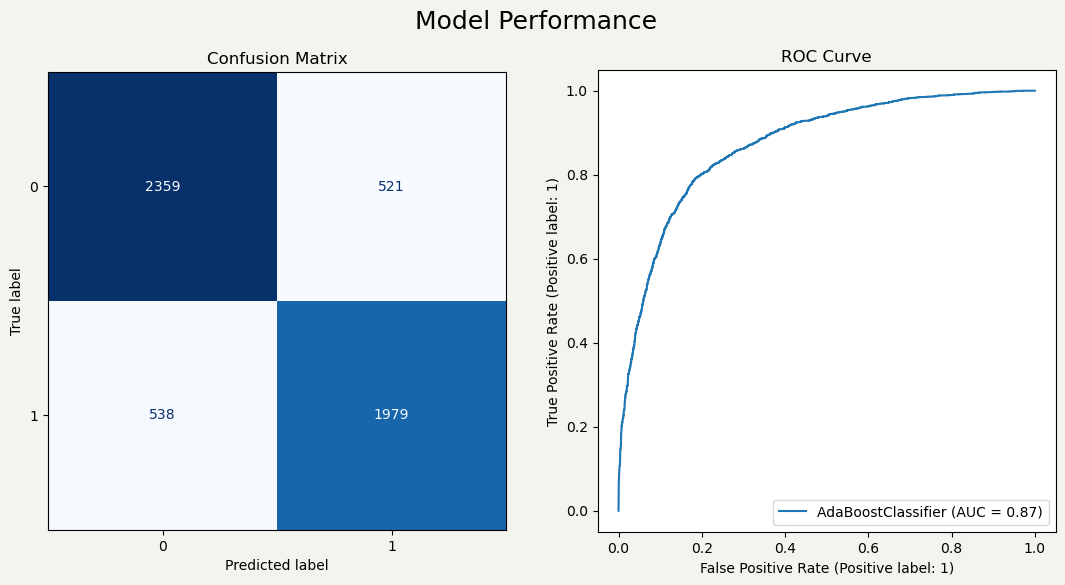

In [58]:
plt.rcParams["figure.facecolor"] = "#F5F3ED"

fig, ax = plt.subplots(1, 2, figsize=(13, 6))
ConfusionMatrixDisplay.from_estimator(model, X_test_ct, y_test, cmap='Blues', colorbar=False, ax=ax[0])
RocCurveDisplay.from_estimator(model, X_test_ct, y_test, ax=ax[1])

ax[0].set_title('Confusion Matrix')
ax[1].set_title('ROC Curve')

fig.suptitle('Model Performance', fontsize=18)

plt.savefig('../images/model_performance.png', dpi=300);

### Conclusion: 

Considering all the data problems we encountered in this project, an accuracy of %80.4, improving the base 27 percentage point is arguably very impressive.  

It is reasonable to expect that with a more trustworthy and more consistent dataset, we can achieve much better predictive scores. By incorporating a larger dataset, the model can capture more diverse patterns and gain a better understanding of the underlying relationships in the data. This can lead to even more accurate predictions and higher performance metrics.